# Multiple Linear Regression on Salary Data. 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pylab import*
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#from plotly.graph_objs import FigureWidget
#import cufflinks as cf  
#cf.go_offline() 
import ipywidgets as widgets

* The salary metadata data is imported below using the pandas pd.read_csv function along with the "sep='\t'" method to allow us to be able to read the csv file.

In [2]:
metadata = pd.read_csv("Salary_metadata.csv", sep='\t')

In [3]:
metadata

Variable;Type;Explanation
0          salary;Continuous;Annual salary in dollars
1   exprior;Continuous;Years of experience prior t...
2   yearsworked;Continuous;Years worked in this field
3   yearsrank;Continuous;Years worked at current r...
4   market;Continuous;Market value (1 = salary at ...
5          degree;Binary;Has degree (0 = no, 1 = yes)
6   otherqual;Binary;Has other post-secondary qual...
7   position;Categorical;Position (1 = Junior Empl...
8                         male;Binary;0 = no, 1 = yes
9   Field;Categorical;Field of work (1 = Engineeri...
10  yearsabs;Continuous;Years absent from work (e....

* Import salary.csv as data using pd.read_csv method.

In [4]:
dataframe = pd.read_csv("salary.csv")

* We use the .isnull().values.any() method to check if there are any NaN values within the salary DataFrame.

In [5]:
dataframe.isnull().values.any()

True

In [6]:
#Use .dropna() to drop all nan values.
df = pd.read_csv("salary.csv").dropna()

In [7]:
#Check the data using the .head() method.
df.head()

salary  exprior  yearsworked  yearsrank  market  degree  otherqual  \
0  53000.0        0            0          0    1.17       1          0   
1  58000.0        1            0          0    1.24       1          0   
2  45500.0        0            0          0    1.21       1          0   
3  35782.0        0            2          1    0.99       1          0   
4  34731.0        0            2          2    0.91       1          0   

   position  male  Field  yearsabs  
0         1     1      3         0  
1         1     1      2         0  
2         1     1      3         2  
3         1     1      4         1  
4         1     1      4         1

# Split your data into a training and test set. 

* We will need to first split up our data into an X_array that contains the features to train on, and a y_array with the target variable, in this case the Salary column.

In [8]:
y = df['salary']
X = df[['exprior','yearsworked', 'yearsrank', 'market', 'degree', 'otherqual', 'position', 'male', 'Field', 'yearsabs']]

* We will need to first split up our data into an X_array that contains the features to train on, and a y_array with the target variable, in this case the Salary column.

* Below we use the train_test_split() fucntion to split the data, we will pass the variable X and y obtained above, along with test_size=0.20 which is used to indicate that the test data should be 20% of the total data and rest 80% should be train data with a random_state of 42.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20, random_state=42)

In [10]:
print("X_train:")
X_train.head()


X_train:


salary  exprior  yearsworked  yearsrank  market  degree  otherqual  \
321  55608.00000        1           25         21    0.96       1          0   
330  48327.00000       25            2          2    0.78       1          0   
173  61453.00000        0           15          0    1.21       1          0   
273  65432.00000        0           23         12    0.99       1          0   
493  44410.85547        7           12         10    0.72       1          0   

     position  male  Field  yearsabs  
321         2     1      4         0  
330         2     1      4         1  
173         2     1      1         0  
273         3     1      1         1  
493         2     0      3        51

In [11]:
print("X_test:")

X_test.head()

X_test:


salary  exprior  yearsworked  yearsrank  market  degree  otherqual  \
305  48456.0        1           24         16    0.85       1          0   
497  48681.0        0           19         12    1.05       1          0   
440  41915.0        0           10          4    0.82       1          0   
153  42954.0        6            9          0    0.92       1          0   
499  45669.0        2           18          5    0.73       1          0   

     position  male  Field  yearsabs  
305         2     1      4         0  
497         2     0      4        52  
440         2     0      4         1  
153         3     1      3         1  
499         2     0      3        56

In [12]:
print(X_train.shape)
print(X_test.shape)

(410, 11)
(103, 11)


* Create multiple linear regression object [mlm].

In [13]:
mlm = linear_model.LinearRegression()

*  Train the multiple linear model using the training sets X_train and y_train.

In [14]:
mlm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# print the coefficients
print (mlm.intercept_)
print (mlm.coef_)

-1.4551915228366852e-11
[ 1.00000000e+00 -2.60878222e-14  4.87242261e-15  3.27717444e-14
 -1.90047170e-12 -8.77879292e-13  3.45075783e-13 -4.58673343e-13
 -1.36119262e-13 -2.17519165e-13  2.34614076e-16]


In [16]:
# Predicting the Test set results

Y_Pred = mlm.predict(X_test)

In [165]:

# explore
featured_cols = ['degree', 'position', 'Field', 'male']

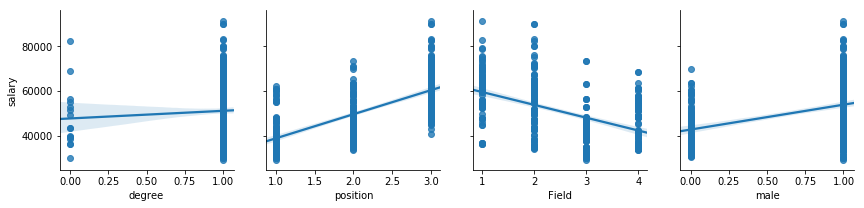

In [171]:
# multiple scatter plots in Seaborn
sns.pairplot(X_train, x_vars=featured_cols, y_vars='salary', kind='reg',height=3)

In [ ]:
# manually calculate the prediction
mlm.intercept_ + mlm.coef_*40

In [ ]:
#mlm.ols.summary()

In [ ]:
#X_train.iplot(kind='scatter', x=['yearsrank', 'yearsworked'], y='salary',mode='markers',marker=dict(color='black'))

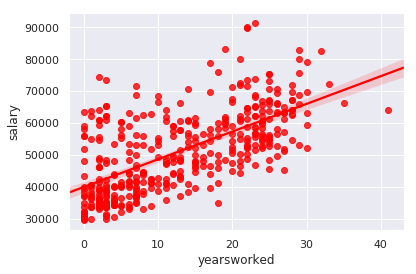

In [175]:
sns.set(color_codes=True)
sns.regplot(x="yearsworked", y="salary", color = "red", data=X_train);

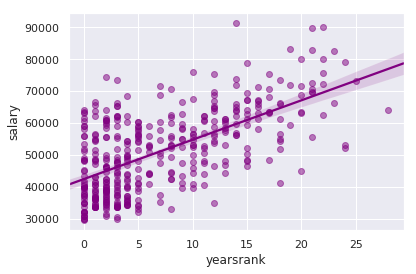

In [176]:

# Seaborn scatter plot with regression line
sns.regplot(x='yearsrank', y='salary', data=X_train, color="purple", scatter_kws={'alpha':0.5})

In [ ]:

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((mlm.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


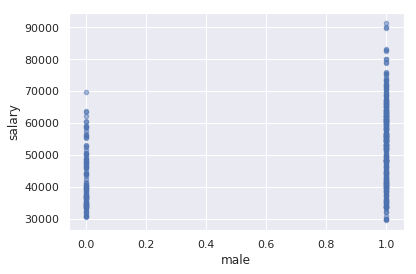

In [214]:
X_train.plot(kind='scatter', x='male', y='salary', alpha=0.5)

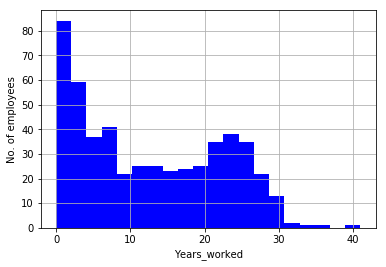

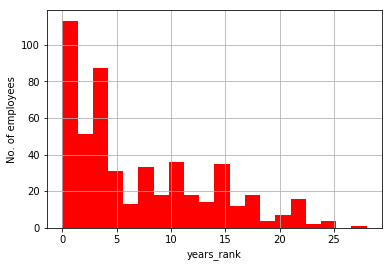

In [42]:

df["yearsworked"].hist(color="b", bins=20, alpha=1.0)
plt.xlabel("Years_worked")
plt.ylabel("No. of employees")
plt.show()

df["yearsrank"].hist(color="r", bins=20, alpha=1.0)
plt.xlabel("years_rank")
plt.ylabel("No. of employees")

plt.show()

Text(0, 0.5, 'No. of employees')

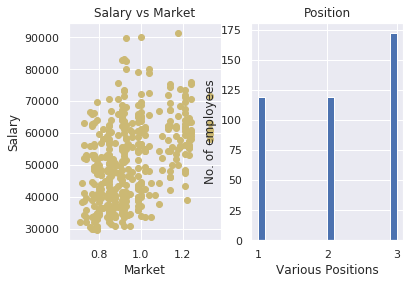

In [200]:
subplot(1,2,1)
plt.scatter(X_train['market'], X_train['salary'], c='y')
plt.title("Salary vs Market")
plt.xlabel("Market")
plt.ylabel("Salary")

subplot(1,2,2)
plt.hist(X_train['position'],data=X_train, bins=20)
plt.title("Position")
plt.xlabel("Various Positions")
plt.ylabel("No. of employees")


### 2.One-hot encode the variable Field into three dummy variables, using HR as the reference category. You can use pandas' get_dummies() function for this.

In [220]:
#Replace 1,2,3,4 with (' Engineering', 'Finance', 'Human Resources', 'Marketing')
df['Field'] = df['Field'].replace([1,2,3,4],[' Engineering', 'Finance', 'Human Resources', 'Marketing'])

In [221]:
HR = pd.get_dummies(df["Field"])

In [222]:
HR.head()

Engineering  Finance  Human Resources  Marketing
0             0        0                1          0
1             0        1                0          0
2             0        0                1          0
3             0        0                0          1
4             0        0                0          1

In [229]:
#X_train.plot(kind='scatter', x="Field", y='salary', alpha=0.9)

In [190]:
#Replace all 1 with 'Male' and 0 with 'Female'
df['male'] = df['male'].replace([1,0],['Male','Female'])

In [191]:
MF = pd.get_dummies(df["male"])

In [192]:
MF.head()

Female  Male
0       0     1
1       0     1
2       0     1
3       0     1
4       0     1

In [193]:
#Replace all 1 with 'Yes' and 0 with 'No'
df['degree'] = df['degree'].replace([1,0],['Yes','No'])

In [194]:
DG = pd.get_dummies(df["degree"])

In [195]:
DG.head()

No  Yes
0   0    1
1   0    1
2   0    1
3   0    1
4   0    1

In [196]:
#Replace all 1 with 'Junior Employee', 2 with 'Manager' and 3 with 'Executive'.
df['position'] = df['position'].replace([1, 2, 3],['junior employee','manager', 'Executive'])

In [197]:
PS = pd.get_dummies(df["position"])

In [198]:
PS.head()

Executive  junior employee  manager
0          0                1        0
1          0                1        0
2          0                1        0
3          0                1        0
4          0                1        0

In [246]:
hr = pd.concat([y, MF, PS, HR, DG], axis=1)

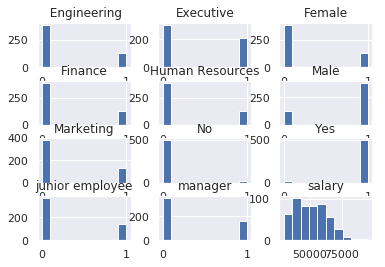

In [247]:
hr.hist(color='b', bins=10, alpha=1.0)
#plt.xlabel("Salary")
#plt.ylabel("years_worked")
plt.show()

In [248]:
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

plotly.offline.iplot({
    "data": [go.Histogram(x=X_train.yearsabs, y=X_train["salary"])],
    "layout": go.Layout(title="Salary ~ Yearsabs")
})

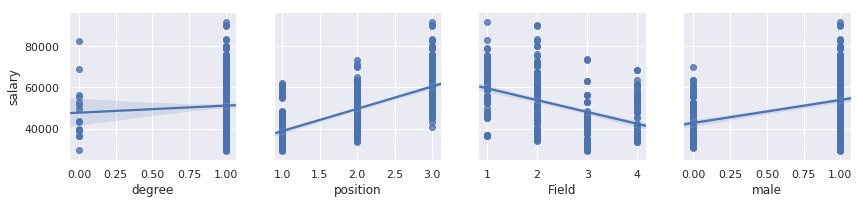

In [249]:
# multiple scatter plots in Seaborn
sns.pairplot(X_train, x_vars=feature_cols, y_vars='salary', kind='reg',height=3)

### 3. Produce a correlation matrix comparing the relationship of salary to the predictor variables. Is there any multicollinearity or other problems that may be a problem in the multiple regression?

In [250]:
#create corr_Xtrain form the X-training data.
corr_X_train = X_train.corr()
#display the correlation of the X_train data.
corr_X_train.style.background_gradient(cmap='coolwarm').set_precision(3)

Multicollinearity is problem that you can run into when you’re fitting a regression model, or other linear model. It refers to predictors that are correlated with other predictors in the model. Unfortunately, the effects of multicollinearity can feel murky and intangible, which makes it unclear whether it’s important to fix. (https://blog.minitab.com/blog/adventures-in-statistics-2/what-are-the-effects-of-multicollinearity-and-when-can-i-ignore-them)

* No there isnt any multiconlinearity in the model.

### 4. Run the multiple linear regression and interpret the standardised coefficients given in the statsmodels output. What are the most important features when predicting employee salary?

* Run a Multiple Leanear model (mlm) with all varibles

In [259]:
mlm = smf.ols(formula='salary ~ yearsworked + yearsrank + market + degree + otherqual +position + Field + male + yearsabs ', data=X_train).fit()

In [260]:
# Display the coefficients derived from the mlm above using the .params method.
mlm.params

Intercept       2800.760165
yearsworked     -236.533739
yearsrank        888.212859
market         31795.849039
degree           344.457661
otherqual       2830.658319
position        8423.706863
Field          -1779.371291
male            1249.439604
yearsabs           0.596803
dtype: float64

* The most important features when predicting employee salaries from the salary data are the position that the employee is in, the years that they have worked (experience) and whether they hold a degree on not.

### 5. Calculate the standardised residuals (resid()) and standardised predicted values (fittedvalues()).

* Below we use the .head(8) method on the .resid() function to display the first 8 standardised residuals values.

In [253]:
mlm.resid.head()

321   -1779.726988
330    8097.697633
173    7065.327668
273     848.827275
493     789.164866
dtype: float64

* Below we use the .head(8) method on the .fittedvalues() function to display the first 8 standardised predicted values.

In [262]:
mlm.fittedvalues.head(8)

321    57387.726988
330    40229.302367
173    54387.672332
273    64583.172725
493    43621.690604
182    55534.883167
269    58722.590808
352    63715.798280
dtype: float64

### 6. Plot the residuals versus the predicted values using seaborn's residplot with fitted values as the x parameter, and the dependent variable as y. lowess=True.

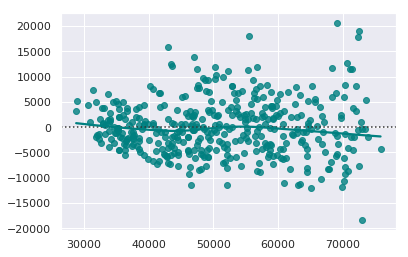

In [255]:
sns.residplot(mlm.fittedvalues, mlm.resid, lowess=True, color="teal")

## Now run your model on the test set.

* We use the mlm model to predict test data.

In [256]:
predictions = mlm.predict(X_test)

*  Here we predict the first 5 predictions.

In [269]:
predictions[0:5]

305    49685.654465
497    52456.233400
440    40135.853235
153    51451.638960
499    38082.366064
dtype: float64

*  The multiple linear model used on y_test data.

Text(0, 0.5, 'True Values')

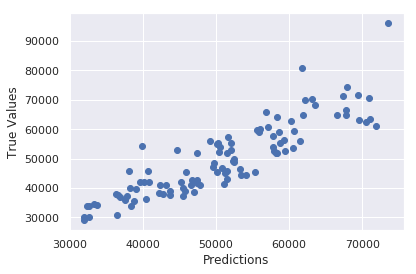

In [271]:
plt.scatter(predictions, y_test)
plt.xlabel('Predictions')
plt.ylabel('True Values')

### 7. How does your model compare when running it on the test set - what is the difference in the Root Mean Square Error (RMSE) between the training and test sets?

In [272]:
mlm.params

Intercept       2800.760165
yearsworked     -236.533739
yearsrank        888.212859
market         31795.849039
degree           344.457661
otherqual       2830.658319
position        8423.706863
Field          -1779.371291
male            1249.439604
yearsabs           0.596803
dtype: float64

ValueError: x and y must be the same size

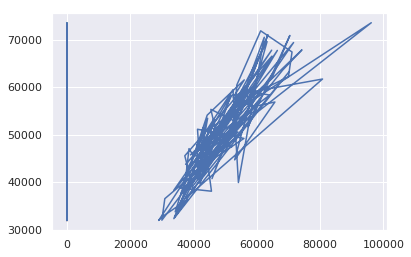

In [289]:
plt.plot(X_test,predictions)   
plt.scatter(X_test,y_test,c='red')
plt.xlabel('headsize')
plt.ylabel('brain weight')

In [273]:
# The coefficients
print('Coefficients: \n', mlm.coef_)

AttributeError: 'OLSResults' object has no attribute 'coef_'

In [274]:
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((mlm.predict(X_test) - y_test) ** 2))

Mean squared error: 34706591.71


In [292]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % mlm.score(X_test, y_test))

AttributeError: 'OLSResults' object has no attribute 'score'

In [279]:
print("Score:",mlm.score(X_test, y_test))

AttributeError: 'OLSResults' object has no attribute 'score'